In [30]:
import sympy as sp
import plotly.graph_objects as go
import numpy as np

from sympy import I as j
from sympy import latex

In [31]:
import plotly.io as pio
pio.templates
pio.templates.default='ggplot2'

In [32]:
w = sp.symbols('w', positive=True)
B = sp.symbols('B', positive=True)

In [33]:
a1, a2 = (0.045, 0.066)

In [34]:
W = a1*j*w / ((a2*j*w + 1)**2)
W = sp.simplify(W)
W

0.045*I*w/(0.066*I*w + 1)**2

In [35]:
latex(W)

'\\frac{0.045 i w}{\\left(0.066 i w + 1\\right)^{2}}'

In [36]:
C = (15*j*w + 1) / (B*j*w)
C = sp.simplify(C)
C

(15*w - I)/(B*w)

In [37]:
P0 = 1 / (0.2*j*w - 1)
P0 = sp.simplify(P0)
P0

1/(0.2*I*w - 1)

In [38]:
S = (1 + P0*C)**-1
S = sp.simplify(S)
S

B*w*(0.2*I*w - 1)/(B*w*(0.2*I*w - 1) + 15*w - I)

In [26]:
latex(S)

'\\frac{B w \\left(0.2 i w - 1\\right)}{B w \\left(0.2 i w - 1\\right) + 15 w - i}'

In [39]:
robust_condition = abs(W*C*S) # < 1 for all w 

In [40]:
robust_condition = sp.simplify(robust_condition)

In [41]:
robust_condition

0.045*w*sqrt(9.0*w**4 + 225.04*w**2 + 1)*sqrt(1/(0.04*B**2*w**4 + B**2*w**2 - 30.4*B*w**2 + 225*w**2 + 1))/sqrt(1.8974736e-5*w**4 + 0.008712*w**2 + 1)

In [28]:
latex(robust_condition)

'\\frac{0.045 w \\sqrt{9.0 w^{4} + 225.04 w^{2} + 1} \\sqrt{\\frac{1}{0.04 B^{2} w^{4} + B^{2} w^{2} - 30.4 B w^{2} + 225 w^{2} + 1}}}{\\sqrt{1.8974736 \\cdot 10^{-5} w^{4} + 0.008712 w^{2} + 1}}'

In [42]:
rob = sp.lambdify([B, w], robust_condition)
robv = np.vectorize(rob)

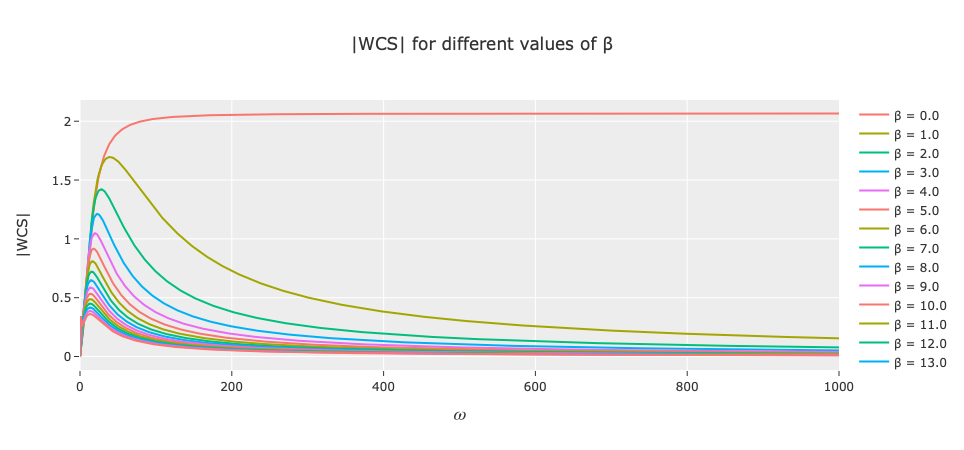

In [47]:
BETA = np.linspace(0, 15, 16)
w = np.linspace(0, 10**3, 1000)

fig = go.Figure()

for b in BETA:
    sys = robv(b, w)
    fig.add_trace(
        go.Scatter(x=w, y=sys, name=f'β = {b}')
)
    
fig.update_layout(
    title='|WCS| for different values of β',
    xaxis_title='$\omega$',
    yaxis_title='|WCS|',
)

fig.show()

In [48]:
fig.write_image('p3.pdf')

In [ ]:
def is_robust(sys):
    arr = sys < 1
    return np.all(arr)
    

In [ ]:
b = 4.261
sys = robv(b, w)
is_robust(sys)

In [ ]:
# this means B < 15 and B >= 4.262 to be stable.